## Tensors

In [0]:
import numpy as np
import torch

In [0]:
x = torch.rand(3,2)
x

tensor([[0.6904, 0.4816],
        [0.1724, 0.6066],
        [0.0627, 0.0545]])

In [0]:
y = torch.ones(x.size())
y

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [0]:
z = x+y
z

tensor([[1.6904, 1.4816],
        [1.1724, 1.6066],
        [1.0627, 1.0545]])

In [0]:
z[0]

tensor([1.6904, 1.4816])

In [0]:
z[:, 1:]

tensor([[1.4816],
        [1.6066],
        [1.0545]])

In [0]:
z.add(1) # creates new tensor
z

tensor([[1.6904, 1.4816],
        [1.1724, 1.6066],
        [1.0627, 1.0545]])

In [0]:
z.add_(1) # modifies z
z

tensor([[2.6904, 2.4816],
        [2.1724, 2.6066],
        [2.0627, 2.0545]])

In [0]:
z.resize_(2,3)

tensor([[2.6904, 2.4816, 2.1724],
        [2.6066, 2.0627, 2.0545]])

In [0]:
a = np.random.rand(4,3)
a

array([[0.1164746 , 0.49552724, 0.06167073],
       [0.01268128, 0.26229523, 0.11184192],
       [0.58279991, 0.57092163, 0.5902175 ],
       [0.21490686, 0.84447243, 0.28776023]])

In [0]:
b = torch.from_numpy(a)
b

tensor([[0.1165, 0.4955, 0.0617],
        [0.0127, 0.2623, 0.1118],
        [0.5828, 0.5709, 0.5902],
        [0.2149, 0.8445, 0.2878]], dtype=torch.float64)

In [0]:
c = b.numpy()
c

array([[0.1164746 , 0.49552724, 0.06167073],
       [0.01268128, 0.26229523, 0.11184192],
       [0.58279991, 0.57092163, 0.5902175 ],
       [0.21490686, 0.84447243, 0.28776023]])

In [0]:
# after creating a tensor from numpy array, they'll both share memory
b.mul_(2)


tensor([[0.2329, 0.9911, 0.1233],
        [0.0254, 0.5246, 0.2237],
        [1.1656, 1.1418, 1.1804],
        [0.4298, 1.6889, 0.5755]], dtype=torch.float64)

In [0]:
a

array([[0.2329492 , 0.99105449, 0.12334145],
       [0.02536256, 0.52459046, 0.22368385],
       [1.16559981, 1.14184325, 1.180435  ],
       [0.42981371, 1.68894487, 0.57552045]])

In [0]:
# that's not true for the opposite
c*2


array([[0.46589841, 1.98210897, 0.2466829 ],
       [0.05072513, 1.04918092, 0.44736769],
       [2.33119963, 2.28368651, 2.36087001],
       [0.85962742, 3.37788974, 1.1510409 ]])

In [0]:
b

tensor([[0.2329, 0.9911, 0.1233],
        [0.0254, 0.5246, 0.2237],
        [1.1656, 1.1418, 1.1804],
        [0.4298, 1.6889, 0.5755]], dtype=torch.float64)

## Define Neural Networks

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

In [0]:
# transform to tensorm and subtract .5 to each channel x pixel and divide by .5 channel x pixel. i.e. move values from 0 to 1 to -1 to 1
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5), (0.5)),
                             ])
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

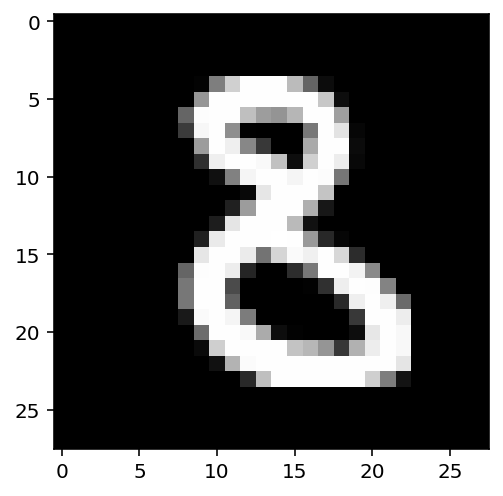

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [0]:
from torch import nn
import torch.nn.functional as F

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()  # calls nn.Module.__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x): # required. x = torch.tensor
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1) # x = (batch_size, input). dim=1, apply softmax on `input`
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
# weights and biases are automatically created
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0323, -0.0223, -0.0226,  ..., -0.0226, -0.0341,  0.0102],
        [-0.0130, -0.0023, -0.0128,  ..., -0.0227, -0.0255, -0.0261],
        [-0.0256,  0.0234, -0.0353,  ...,  0.0011,  0.0231, -0.0219],
        ...,
        [ 0.0021,  0.0002,  0.0063,  ..., -0.0043,  0.0188, -0.0061],
        [ 0.0039, -0.0275, -0.0346,  ...,  0.0243, -0.0356,  0.0329],
        [-0.0008,  0.0083,  0.0205,  ..., -0.0284, -0.0247,  0.0276]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0083, -0.0245,  0.0061, -0.0053,  0.0336,  0.0073,  0.0155, -0.0061,
        -0.0237,  0.0131,  0.0085, -0.0147,  0.0312, -0.0238, -0.0169,  0.0085,
         0.0165, -0.0236,  0.0041,  0.0111,  0.0126, -0.0072, -0.0317,  0.0068,
         0.0260, -0.0268,  0.0267,  0.0235,  0.0285, -0.0135,  0.0060, -0.0162,
         0.0071,  0.0187,  0.0160, -0.0289,  0.0073, -0.0256, -0.0085,  0.0029,
        -0.0015,  0.0008,  0.0129, -0.0103, -0.0164, -0.0347, -0.0051,  0.0041,
         0.0165

In [0]:
# forward pass
# trainloader retruns a generator, therefore we wrap with iter()
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
ps

tensor([[0.1056, 0.0978, 0.1073, 0.0862, 0.0936, 0.1157, 0.0930, 0.0987, 0.1009,
         0.1013]], grad_fn=<SoftmaxBackward>)

In [0]:
# alternative way of defining model
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], output_size),
                       nn.Softmax(dim=1))
print(model)

# OrderedDict can also be used to define network
# this method allows you to name layers
from collections import OrderedDict
# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)
Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [0]:
# to reinitialise parameters
print(model.fc1.bias.data.fill_(0))
print(model.fc1.weight.data.normal_(std=.01)) # normal distribution

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])
tensor([[-0.0047, -0.0016,  0.0087,  ...,  0.0034,  0.0086, -0.0021],
        [ 0.0131, -0.0054,  0.0158,  ..., -0.0089,  0.0045, -0.0009],
        [ 0.0063,  0.0059, -0.0152,  ...,  0.0183,  0.0053,  0.0050],
        ...,
        [-0.0034, -0.0060,  0.0101,  ..., -0.0090,  0.0169,  0.0031],
        [ 0.0044, -0.0035, -0.0277,  ...,  0.0272,  0.0011,  0.0171],
        [ 0.0006,  0.0093, -0.0066,  ...,  0.0032, -0.0049,  0.0092]])


In [0]:
# forward pass
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
images[0].view(1,28,28)

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

## Train Neural Networks

To calculate gradients, PyTorch uses autograd. Given tensor z, autograd keeps track of every operation z.
z.backward() performs backprop returning the gradient.

In [0]:
x = torch.randn(2, 2, requires_grad=True)
print(x)
y = x**2
print(y.grad_fn) # shows operations performed to get y
z = y.mean()

tensor([[-0.7819, -0.0889],
        [-0.7190, -0.4694]], requires_grad=True)


In [0]:
z.backward() # gradient of z w.r.t. x
print(x.grad)
print(x/2) # expected gradient

tensor([[-0.3909, -0.0445],
        [-0.3595, -0.2347]])
tensor([[-0.3909, -0.0445],
        [-0.3595, -0.2347]], grad_fn=<DivBackward0>)


In [0]:
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[1], output_size))]))

In [0]:
from torch import optim

# PyTorch jargon for loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [0]:
images.resize_(64, 784)

# do this every pass to get new gradients!
optimizer.zero_grad() # zeros out all gradients on parameters being trained

output = model.forward(images)
loss = criterion(output, labels)
loss.backward()

optimizer.step() # use gradient to update weights

In [0]:
# training
epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        steps += 1

        images.resize_(images.size()[0], 784)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() # loss is scalar tensor (size 1)
        if steps%print_every == 0:
            print('Epoch{}/{}...'.format(e+1, epochs),
                 'Loss {:.4f}'.format(running_loss/print_every))
            running_loss = 0

Epoch1/3... Loss 2.2911
Epoch1/3... Loss 2.2746
Epoch1/3... Loss 2.2583
Epoch1/3... Loss 2.2429
Epoch1/3... Loss 2.2215
Epoch1/3... Loss 2.2011
Epoch1/3... Loss 2.1689
Epoch1/3... Loss 2.1551
Epoch1/3... Loss 2.1187
Epoch1/3... Loss 2.0789
Epoch1/3... Loss 2.0319
Epoch1/3... Loss 1.9909
Epoch1/3... Loss 1.9547
Epoch1/3... Loss 1.9002
Epoch1/3... Loss 1.8473
Epoch1/3... Loss 1.7889
Epoch1/3... Loss 1.7177
Epoch1/3... Loss 1.6625
Epoch1/3... Loss 1.5727
Epoch1/3... Loss 1.5150
Epoch1/3... Loss 1.4527
Epoch1/3... Loss 1.3894
Epoch1/3... Loss 1.3159
Epoch2/3... Loss 0.6706
Epoch2/3... Loss 1.1947
Epoch2/3... Loss 1.1440
Epoch2/3... Loss 1.0861
Epoch2/3... Loss 1.0394
Epoch2/3... Loss 1.0090
Epoch2/3... Loss 0.9824
Epoch2/3... Loss 0.9154
Epoch2/3... Loss 0.8895
Epoch2/3... Loss 0.8545
Epoch2/3... Loss 0.8278
Epoch2/3... Loss 0.7819
Epoch2/3... Loss 0.7833
Epoch2/3... Loss 0.7418
Epoch2/3... Loss 0.7371
Epoch2/3... Loss 0.7018
Epoch2/3... Loss 0.6950
Epoch2/3... Loss 0.6894
Epoch2/3... Loss

torch.Size([32, 784])


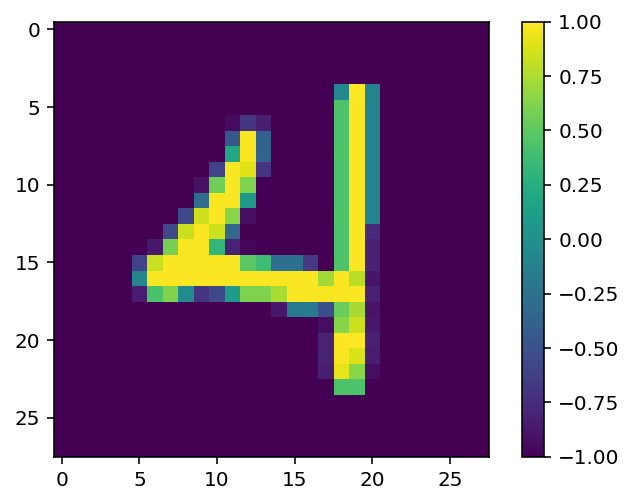

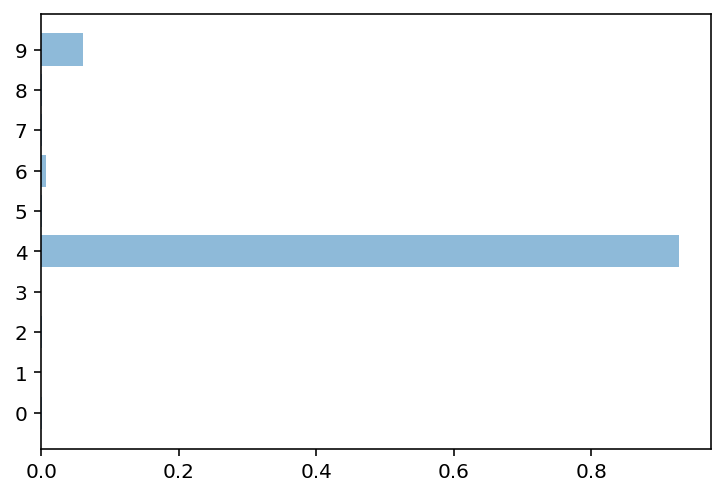

In [0]:
# check performance
print(images.size())
img = images[np.random.choice(images.size()[0])].view(1, 784)
with torch.no_grad(): # turn off gradients to speed up this part
    logits = model.forward(img)
    
ps = F.softmax(logits, dim=1)
plt.imshow(img.view(28,28))
plt.colorbar()
plt.show()

plt.barh(range(10), ps[0].numpy(), align='center', alpha=0.5)
plt.yticks(range(10))
plt.show()